In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import datetime
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud

def contar(dataFrame, columna):
    llamados = pd.DataFrame(dataFrame[columna].value_counts())
    llamados.columns = ["Cantidad"]
    llamados.index.name = "Fecha"
    llamados.reset_index(inplace = True)
    llamados = llamados.sort_values("Fecha")
    return llamados

def grafico(variable_x, variable_y, color):
    plot1 = plt.figure(1)
    plt.plot(variable_x, variable_y, color = color, linewidth=2)
    plot1.set_size_inches(12,8)
    plt.grid(color = "white")
    ax = plt.gca()
    ax.set_facecolor("#EBE8EA")
    ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
    ax.spines["right"].set_visible(False) #saca los bordes del gráfico
    ax.spines["left"].set_visible(False) #saca los bordes del gráfico
    ax.spines["top"].set_visible(False) #saca los bordes del gráfico
    plt.show()

def media_movil(base1, columna_datos1, base2, columna_datos2, cantidad_observaciones):
    base1["Media"] = base1[columna_datos1].rolling(cantidad_observaciones).mean()
    base1["Referencia"] = "Media casos confirmados"
    base2["Media"] = base2[columna_datos2].rolling(cantidad_observaciones).mean()
    base2["Referencia"] = "Media llamados"
    medias = pd.merge(base1, base2, on = ["Fecha","Referencia", "Media"], how = "outer", indicator = True)
    medias = medias.sort_values("Fecha")
    return medias

def grafico_medias(base):
    medias_set = set(base["Referencia"])
    plot1 = plt.figure(1)
    for media in medias_set:
        selected_data = base.loc[base["Referencia"] == media]
        plt.plot(selected_data["Fecha"], selected_data["Media"], label = media, linewidth = 2)
    plt.legend(loc = "upper left")
    plt.grid(color = "white") #grilla de fondo
    plot1.set_size_inches(12,8)
    ax = plt.gca()
    ax.set_facecolor("#EBE8EA") #color de fondo
    ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
    ax.spines["right"].set_visible(False) #saca los bordes del gráfico
    ax.spines["left"].set_visible(False) #saca los bordes del gráfico
    ax.spines["top"].set_visible(False) #saca los bordes del gráfico
    plt.show()

def agrupacion_grupo_edad(base, localidad):
    confirmados = base[base.LOCALIDAD_RESIDENCIA == localidad]
    confirmados_grupo_edad = pd.DataFrame(confirmados["GRUPO_ETARIO_DECADA"].value_counts())
    confirmados_grupo_edad.columns = [localidad]
    confirmados_grupo_edad.index.name = "GRUPO ETARIO"
    confirmados_grupo_edad.reset_index(inplace = True)
    confirmados_grupo_edad = confirmados_grupo_edad.sort_values("GRUPO ETARIO")
    return confirmados_grupo_edad

def defunciones_grupo_edad(base, localidad):
    defunciones = base[base.FALLECIDO == "SI"]
    defunciones = defunciones[base.LOCALIDAD_RESIDENCIA == localidad]
    defunciones.head()
    defunciones = pd.DataFrame(defunciones["GRUPO_ETARIO_DECADA"].value_counts())
    defunciones.columns = [localidad]
    defunciones.index.name = "GRUPO ETARIO"
    defunciones.reset_index(inplace = True)
    defunciones = defunciones.sort_values("GRUPO ETARIO")
    return defunciones

def internaciones(base, localidad, camas):
    confirmados_localidad = base[base.LOCALIDAD_RESIDENCIA == localidad]
    ocupacion_camas_localidad = pd.DataFrame(confirmados_localidad[["FECHA_APERTURA", "FECHA_INTERNACION", "CURADO", "CUIDADO_INTENSIVO", "FECHA_CUI_INTENSIVOS", "FALLECIDO", "FECHA_ALTA_MEDICA", "FECHA_FALLECIMIENTO"]])
    ocupacion_camas_localidad['FECHA_APERTURA'] = pd.to_datetime(ocupacion_camas_localidad['FECHA_APERTURA'], format = "%d/%m/%Y")
    ocupacion_camas_localidad['FECHA_INTERNACION'] = pd.to_datetime(ocupacion_camas_localidad['FECHA_INTERNACION'], format = "%d/%m/%Y")
    ocupacion_camas_localidad['FECHA_CUI_INTENSIVOS'] = pd.to_datetime(ocupacion_camas_localidad['FECHA_CUI_INTENSIVOS'], format = "%d/%m/%Y")
    ocupacion_camas_localidad['FECHA_ALTA_MEDICA'] = pd.to_datetime(ocupacion_camas_localidad['FECHA_ALTA_MEDICA'], format = "%d/%m/%Y")
    ocupacion_camas_localidad['FECHA_FALLECIMIENTO'] = pd.to_datetime(ocupacion_camas_localidad['FECHA_FALLECIMIENTO'], format = "%d/%m/%Y")
    ocupacion_camas_localidad = ocupacion_camas_localidad.sort_values("FECHA_CUI_INTENSIVOS")
    ocupacion_camas_localidad["fecha_alta"] = np.where((ocupacion_camas_localidad["FECHA_CUI_INTENSIVOS"].notnull()) & (ocupacion_camas_localidad["FECHA_ALTA_MEDICA"].notnull()),                      ocupacion_camas_localidad["FECHA_ALTA_MEDICA"], np.datetime64('NaT'))
    ocupacion_camas_localidad["fecha_alta2"] = np.where((ocupacion_camas_localidad["FECHA_CUI_INTENSIVOS"].notnull()) & (ocupacion_camas_localidad["FECHA_FALLECIMIENTO"].notnull()), 
    ocupacion_camas_localidad["FECHA_FALLECIMIENTO"], np.datetime64('NaT'))
    ocupacion_camas_localidad["fecha_alta"] = np.where(pd.isnull(ocupacion_camas_localidad["fecha_alta"]), ocupacion_camas_localidad["fecha_alta2"], ocupacion_camas_localidad["fecha_alta"])
    ocupacion_camas_localidad["alta_dico"] = np.where(pd.isnull(ocupacion_camas_localidad["fecha_alta"]), 0, 1)
    FECHA_INTERNACION = pd.DataFrame(ocupacion_camas_localidad["FECHA_CUI_INTENSIVOS"].value_counts())
    FECHA_INTERNACION.columns = ["Internados"]
    FECHA_INTERNACION.index.name = "Fecha"
    FECHA_INTERNACION.reset_index(inplace= True)
    FECHA_INTERNACION = FECHA_INTERNACION.sort_values("Fecha")
    FECHA_ALTA = pd.DataFrame(ocupacion_camas_localidad["fecha_alta"].value_counts())
    FECHA_ALTA.columns = ["Altas"]
    FECHA_ALTA.index.name = "Fecha"
    FECHA_ALTA.reset_index(inplace= True)
    FECHA_ALTA = FECHA_ALTA.sort_values("Fecha")
    fechas_internaciones = pd.merge(FECHA_INTERNACION, FECHA_ALTA, on = "Fecha", how = "outer")
    fechas_internaciones = fechas_internaciones.fillna(0)
    fechas_internaciones['Fecha'] = pd.to_datetime(fechas_internaciones['Fecha'], format = "%d/%m/%Y")
    fechas_internaciones = fechas_internaciones.sort_values("Fecha")
    fechas_internaciones["Ocup"] = fechas_internaciones["Internados"] - fechas_internaciones["Altas"]
    fechas_internaciones["Acumulado"] = np.cumsum(fechas_internaciones["Ocup"])
    fechas_internaciones["Porc_ocup"] = round((fechas_internaciones["Acumulado"]/camas),2)*100
    return fechas_internaciones

def semaforo(base_casos_confirmados, base_llamados):
    base_casos_confirmados = pd.DataFrame(base_casos_confirmados.iloc[:-7,])
    base_casos_confirmados.values.reshape(1,-1)
    modelo = LinearRegression().fit(base_casos_confirmados["Cantidad"].values.reshape(-1, 1), base_casos_confirmados["Fecha"])
    b_rg = modelo.intercept_
    x_rg = base_llamados["Porc_ocup"][-1:]
    condiciones = [
        ((x_rg < 40) & (b_rg < 0)),
        ((x_rg < 40) & (b_rg > 0)),
        ((40 < x_rg) & (x_rg < 60) & (b_rg < 0)),
        ((40 < x_rg) & (x_rg < 60) & (b_rg > 0)),
        ((60 < x_rg) & (x_rg < 80) & (b_rg < 0)),
        ((60 < x_rg) & (x_rg < 80) & (b_rg > 0)),
        ((x_rg > 80) & (b_rg < 0)),
        ((x_rg > 80) & (b_rg > 0))
    ]

    eleccion = ["Verde", "Amarillo", "Verde", "Naranja", "Amarillo", "Rojo", "Naranja", "Rojo"]
    semaforo = pd.DataFrame(np.select(condiciones, eleccion))
    if semaforo[0][0] == "Green":
        wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (28,166,6)).generate(semaforo[0][0])
    elif semaforo[0][0] == "Amarillo":
        wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (237,240,46)).generate(semaforo[0][0])
    elif semaforo[0][0] == "Naranja":
        wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (239,147,36)).generate(semaforo[0][0])
    else:
        wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (255,0,0)).generate(semaforo[0][0])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [2]:
# Importación de los datos
llamados = pd.read_csv("/home/cecilia/Descargas/llamados_107.csv", sep = ",")
llamados = pd.DataFrame(llamados)
llamados = llamados.drop(llamados[llamados['fecha_llamado']=="01/01/0001"].index) # Se elimina un registro
llamados['fecha_llamado'] = pd.to_datetime(llamados['fecha_llamado'], format = "%d/%m/%Y") # Formato fecha a variable fecha
llamados_cuenta = contar(llamados, "fecha_llamado")
llamados_cuenta = llamados_cuenta[:len(llamados_cuenta)-1] # Se elimina el último registro (llamadas del día que se actualiza el tablero)

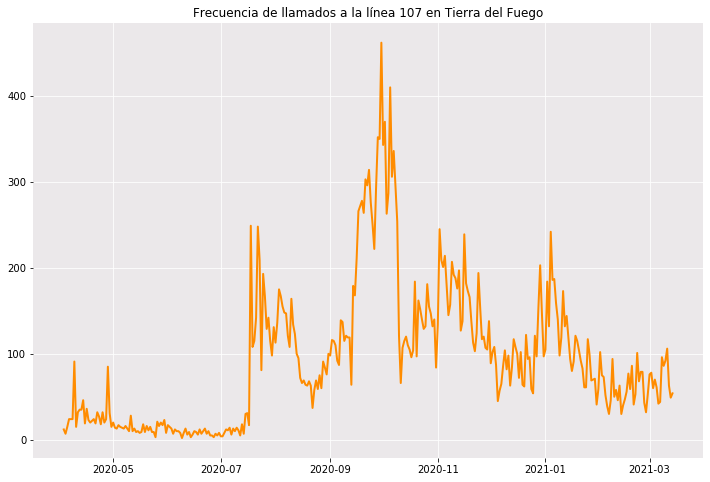

In [3]:
# Gráfico llamadas Tierra del Fuego
plt.title("Frecuencia de llamados a la línea 107 en Tierra del Fuego")
grafico(llamados_cuenta["Fecha"], llamados_cuenta["Cantidad"], color= "darkorange")

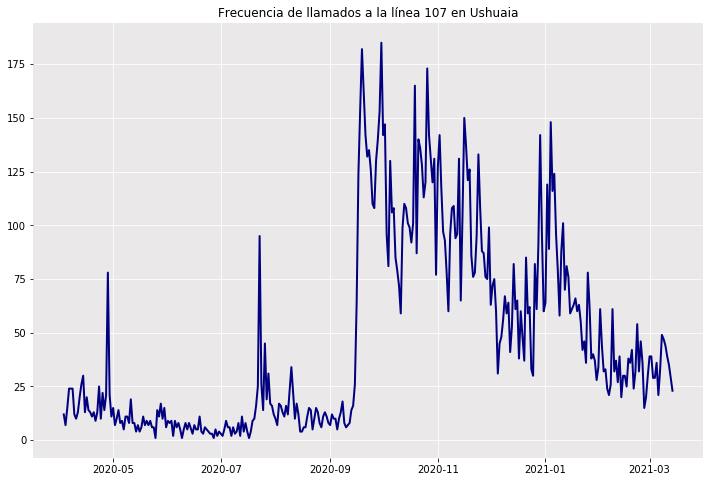

In [4]:
# Gráfico llamadas Ushuaia
llamados_ush = llamados[llamados.locallidad == "Ushuaia"]
llamados_ush = contar(llamados_ush, "fecha_llamado")
llamados_ush = llamados_ush[:len(llamados_ush)-1]

plt.title("Frecuencia de llamados a la línea 107 en Ushuaia")
grafico(llamados_ush["Fecha"], llamados_ush["Cantidad"], color = "navy")

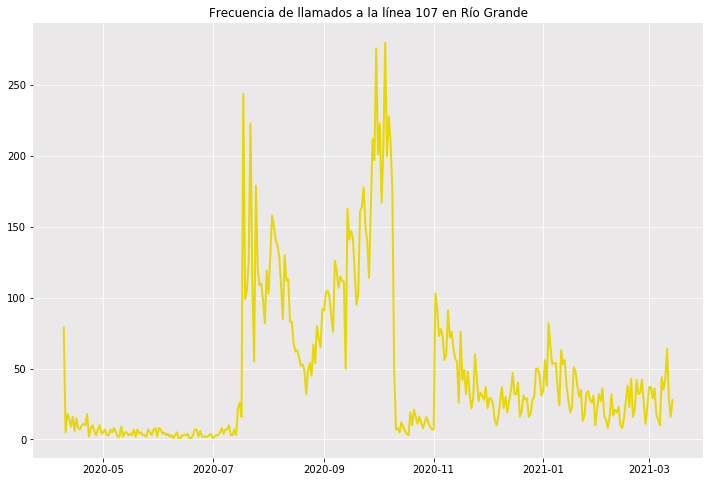

In [5]:
# Gráfico llamadas Río Grande
llamados_rg = llamados[llamados.locallidad == "Río Grande"]
llamados_rg = contar(llamados_rg, "fecha_llamado")
llamados_rg = llamados_rg[:len(llamados_rg)-1]

plt.title("Frecuencia de llamados a la línea 107 en Río Grande")
grafico(llamados_rg["Fecha"], llamados_rg["Cantidad"], color = "#E8D706")

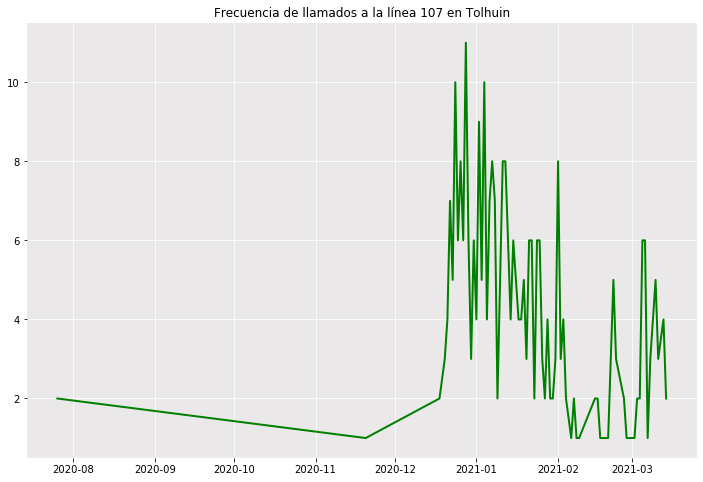

In [6]:
# Gráfico llamadas Tolhuin
llamados_tol = llamados[llamados.locallidad == "Tolhuin"]
llamados_tol = contar(llamados_tol, "fecha_llamado")
llamados_tol = llamados_tol[:len(llamados_tol)-1]

plt.title("Frecuencia de llamados a la línea 107 en Tolhuin")
grafico(llamados_tol["Fecha"], llamados_tol["Cantidad"], color = "green")

In [7]:
# Importación de los casos
casos = pd.read_csv("/home/cecilia/Descargas/sisa/snvsExports/report/TIERRA_DEL_FUEGO-15-03-2021_07-05-22.csv", sep = ",")
casos = pd.DataFrame(casos)

# Selección de los confirmados
casos_confirmados = casos[casos.CLASIF_RESUMEN == "Confirmado"]
casos_confirmados['FECHA_APERTURA'] = pd.to_datetime(casos_confirmados['FECHA_APERTURA'], format = "%d/%m/%Y")

# Recuento de cantidad de confirmados por día
casos_confirmados_cuenta = contar(casos_confirmados, "FECHA_APERTURA")

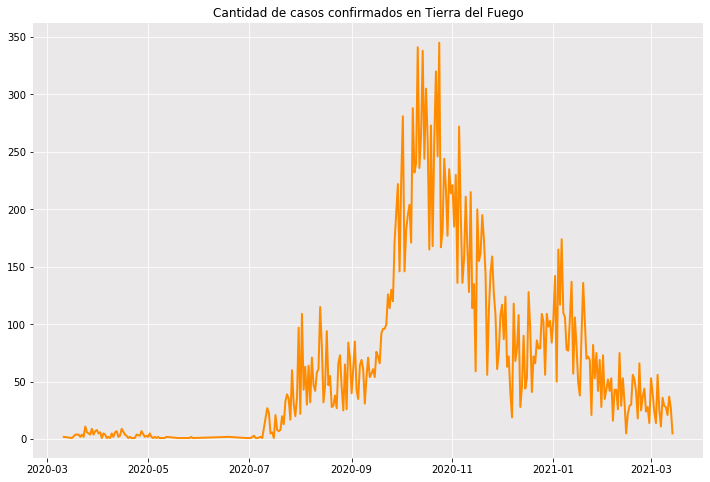

In [8]:
plt.title("Cantidad de casos confirmados en Tierra del Fuego")
grafico(casos_confirmados_cuenta["Fecha"], casos_confirmados_cuenta["Cantidad"], color = "darkorange")

In [9]:
confirmados_cuenta_localidad_fecha = pd.DataFrame(casos_confirmados.groupby(["LOCALIDAD_RESIDENCIA", "FECHA_APERTURA"]).size().reset_index(name = "Cantidad")) # Cuenta cantidad de ocurrencias por localidad y fecha

confirmados_cuenta_localidad_fecha = confirmados_cuenta_localidad_fecha[(confirmados_cuenta_localidad_fecha.LOCALIDAD_RESIDENCIA == "USHUAIA") | (confirmados_cuenta_localidad_fecha.LOCALIDAD_RESIDENCIA == "RIO GRANDE") | (confirmados_cuenta_localidad_fecha.LOCALIDAD_RESIDENCIA == "TOLHUIN")]
confirmados_cuenta_localidad_fecha.columns = ["Localidad", "Fecha", "Cantidad"]


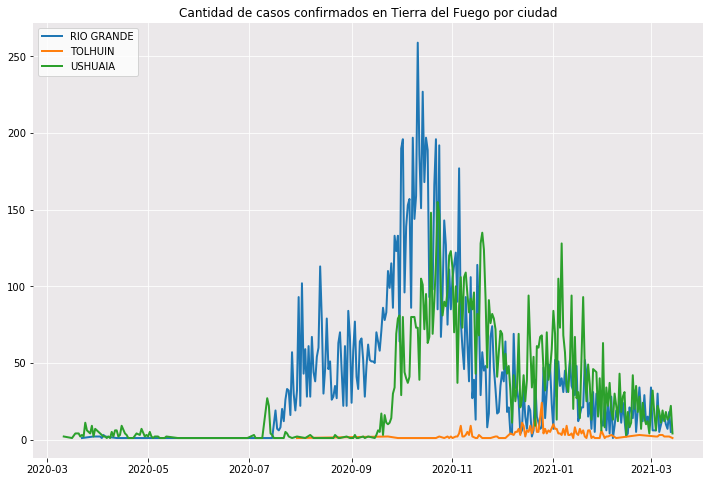

In [10]:
localidad_set = set(confirmados_cuenta_localidad_fecha["Localidad"])
plot6 = plt.figure(6)
for localidad in localidad_set:
    selected_data = confirmados_cuenta_localidad_fecha.loc[confirmados_cuenta_localidad_fecha["Localidad"] == localidad]
    plt.plot(selected_data["Fecha"], selected_data["Cantidad"], label = localidad, linewidth = 2)
plt.legend(loc = "upper left")
plt.grid(color = "white") #grilla de fondo
plt.title("Cantidad de casos confirmados en Tierra del Fuego por ciudad")
plot6.set_size_inches(12,8)
ax = plt.gca()
ax.set_facecolor("#EBE8EA") #color de fondo
ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
ax.spines["right"].set_visible(False) #saca los bordes del gráfico
ax.spines["left"].set_visible(False) #saca los bordes del gráfico
ax.spines["top"].set_visible(False) #saca los bordes del gráfico
plt.show()

In [11]:
#Cantidad de casos confirmados en Ushuaia
casos_confirmados_ush = casos_confirmados[casos_confirmados.LOCALIDAD_RESIDENCIA == "USHUAIA"]
casos_confirmados_ush = contar(casos_confirmados_ush, "FECHA_APERTURA")

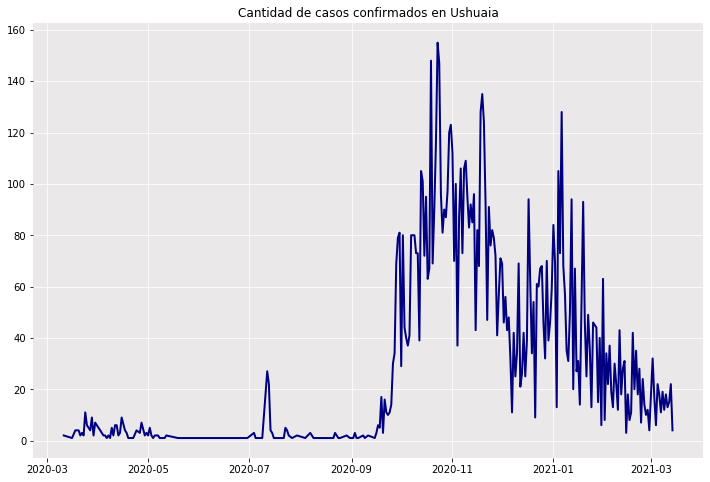

In [12]:
plt.title("Cantidad de casos confirmados en Ushuaia")
grafico(casos_confirmados_ush["Fecha"], casos_confirmados_ush["Cantidad"], color = "navy")

In [13]:
#Cantidad de casos confirmados en Río Grande
casos_confirmados_rg = casos_confirmados[casos_confirmados.LOCALIDAD_RESIDENCIA == "RIO GRANDE"]
casos_confirmados_rg = contar(casos_confirmados_rg, "FECHA_APERTURA")

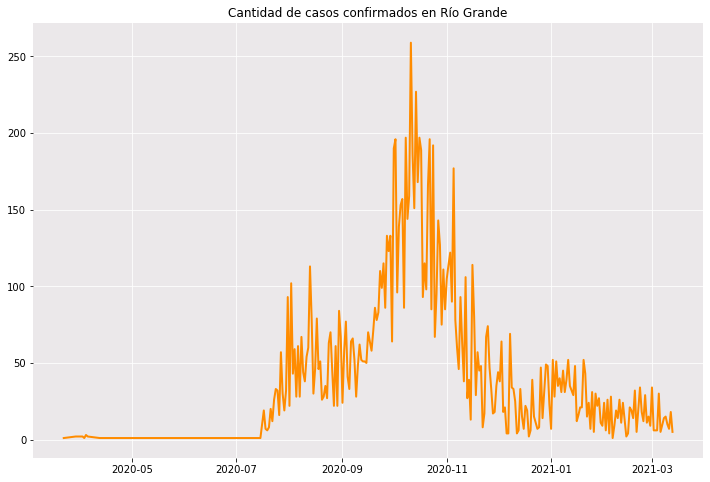

In [14]:
plt.title("Cantidad de casos confirmados en Río Grande")
grafico(casos_confirmados_rg["Fecha"], casos_confirmados_rg["Cantidad"], color = "darkorange")

In [15]:
#Cantidad de casos confirmados en Tolhuin
casos_confirmados_tol = casos_confirmados[casos_confirmados.LOCALIDAD_RESIDENCIA == "TOLHUIN"]
casos_confirmados_tol = contar(casos_confirmados_tol, "FECHA_APERTURA")

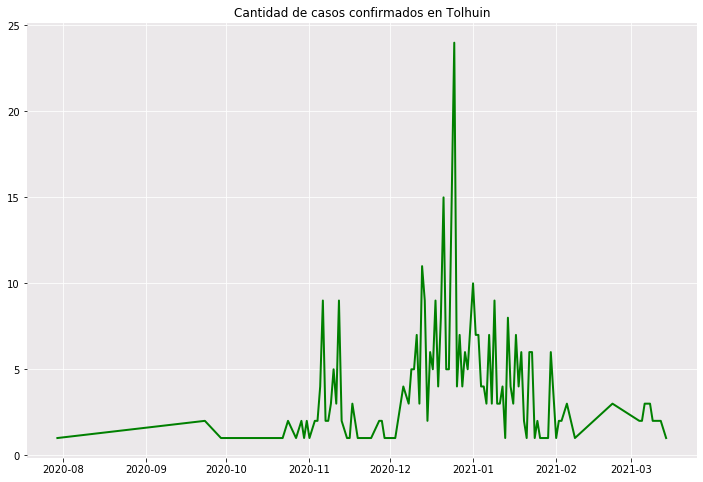

In [16]:
plt.title("Cantidad de casos confirmados en Tolhuin")
grafico(casos_confirmados_tol["Fecha"], casos_confirmados_tol["Cantidad"], color = "green")

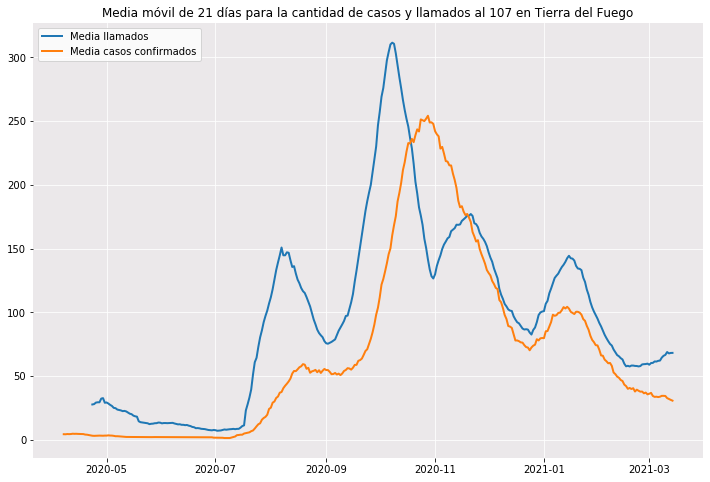

In [57]:
# Medias móviles para Tierra del Fuego

cantidad_observaciones = 21
medias = media_movil(casos_confirmados_cuenta, "Cantidad", llamados_cuenta, "Cantidad", cantidad_observaciones)
plt.title(f"Media móvil de {cantidad_observaciones} días para la cantidad de casos y llamados al 107 en Tierra del Fuego")
grafico_medias(medias)

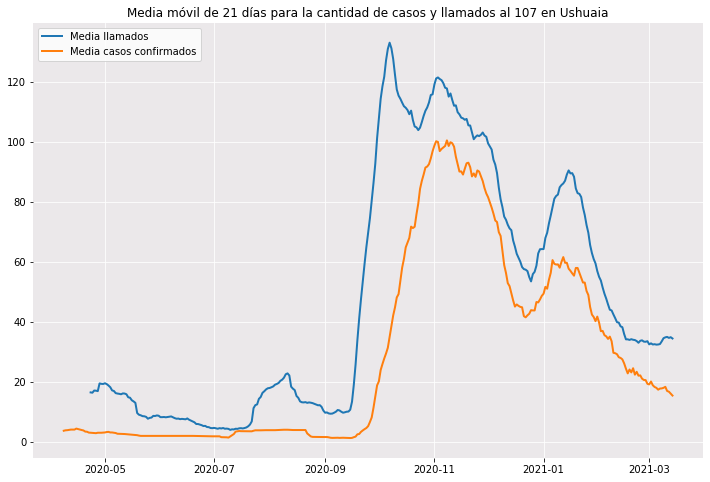

In [58]:
# Medias móviles Ushuaia

cantidad_observaciones = 21
medias = media_movil(casos_confirmados_ush, "Cantidad", llamados_ush, "Cantidad", cantidad_observaciones)
plt.title(f"Media móvil de {cantidad_observaciones} días para la cantidad de casos y llamados al 107 en Ushuaia")
grafico_medias(medias)

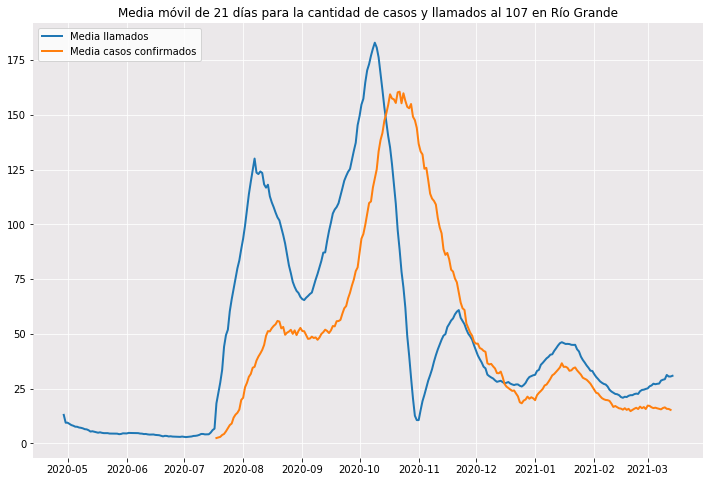

In [63]:
# Medias móviles Río Grande

cantidad_observaciones = 21
medias = media_movil(casos_confirmados_rg, "Cantidad", llamados_rg, "Cantidad", cantidad_observaciones)
plt.title(f"Media móvil de {cantidad_observaciones} días para la cantidad de casos y llamados al 107 en Río Grande")
grafico_medias(medias)

In [108]:
# Cantidad de casos confirmados por ciudad por grupo etareo

confirmados_grupo_etareo_ushuaia = agrupacion_grupo_edad(casos_confirmados, "USHUAIA")
confirmados_grupo_etareo_riogrande = agrupacion_grupo_edad(casos_confirmados, "RIO GRANDE")
confirmados_grupo_etareo_tolhuin = agrupacion_grupo_edad(casos_confirmados, "TOLHUIN")

In [109]:
# Unión de las tres ciudad
confirmados_grupo_etareo_ciudades = pd.merge(confirmados_grupo_etareo_ushuaia, confirmados_grupo_etareo_riogrande, on = ["GRUPO ETARIO"], how = "outer")
confirmados_grupo_etareo_ciudades = pd.merge(confirmados_grupo_etareo_ciudades, confirmados_grupo_etareo_tolhuin, on = ["GRUPO ETARIO"], how = "outer")
confirmados_grupo_etareo_ciudades = confirmados_grupo_etareo_ciudades.fillna(0) #reemplaza el NaN por un 0

In [110]:
# Calculo los totales por columna
total = [confirmados_grupo_etareo_ciudades["USHUAIA"].sum(),confirmados_grupo_etareo_ciudades["RIO GRANDE"].sum(), confirmados_grupo_etareo_ciudades["TOLHUIN"].sum()]
totales = pd.DataFrame({
    "GRUPO ETARIO": ["Total"],
    "USHUAIA": [total[0]],
    "RIO GRANDE": [total[1]],
    "TOLHUIN": [total[2]]
})

# Uno el dataframe con sus totales
confirmados_grupo_etareo_ciudades = confirmados_grupo_etareo_ciudades.append(totales)

In [111]:
# Genero una tabla con la información
fig = go.Figure(data=[go.Table(
    header=dict(values=list(confirmados_grupo_etareo_ciudades.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[confirmados_grupo_etareo_ciudades["GRUPO ETARIO"], confirmados_grupo_etareo_ciudades["USHUAIA"], confirmados_grupo_etareo_ciudades["RIO GRANDE"], confirmados_grupo_etareo_ciudades["TOLHUIN"]],
               fill_color='lightgrey',
               align='left'))
])

fig.show()

In [112]:
defunciones_ushuaia = defunciones_grupo_edad(casos_confirmados, "USHUAIA")
defunciones_rio_grande =defunciones_grupo_edad(casos_confirmados, "RIO GRANDE")
defunciones_tolhuin =defunciones_grupo_edad(casos_confirmados, "TOLHUIN")

In [113]:
defunciones = pd.merge(defunciones_ushuaia, defunciones_rio_grande, on = "GRUPO ETARIO", how = "outer")
defunciones = pd.merge(defunciones, defunciones_tolhuin, on = "GRUPO ETARIO", how = "outer")
defunciones = defunciones.sort_values("GRUPO ETARIO")
defunciones = defunciones.fillna(0)

In [114]:
total = [defunciones["USHUAIA"].sum(), defunciones["RIO GRANDE"].sum(), defunciones["TOLHUIN"].sum()]
totales = pd.DataFrame({
    "GRUPO ETARIO": ["Total"],
    "USHUAIA": [total[0]],
    "RIO GRANDE": [total[1]],
    "TOLHUIN": [total[2]]
})

defunciones = defunciones.append(totales)

In [115]:
# Genero una tabla con la información
fig = go.Figure(data=[go.Table(
    header=dict(values=list(defunciones.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[defunciones["GRUPO ETARIO"], defunciones["USHUAIA"], defunciones["RIO GRANDE"], defunciones["TOLHUIN"]],
               fill_color='lightgrey',
               align='left'))
])

fig.show()

In [138]:
# Ocupacion de camas en Ushuaia

internaciones_ushuaia = internaciones(casos_confirmados, localidad = "USHUAIA", camas = 17)

# Gráfico de porcentaje de ocupación de camas en Ushuaia

plt.title("Porcentaje de ocupación de camas en Ushuaia")
grafico(internaciones_ushuaia["Fecha"], internaciones_ushuaia["Porc_ocup"], color = "navy")

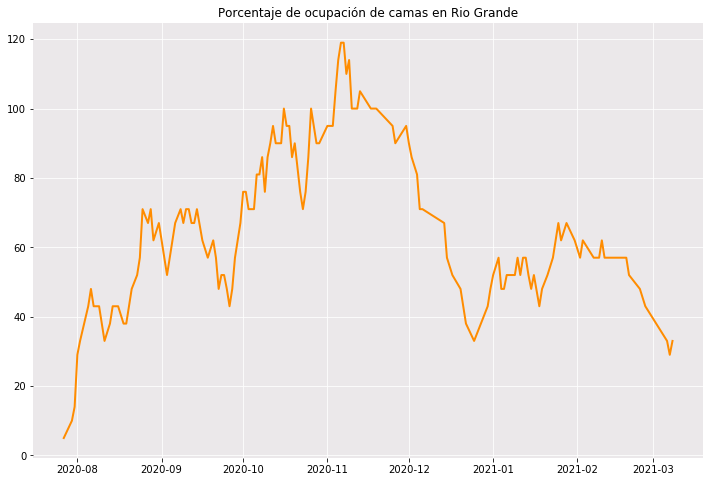

In [141]:
# Ocupacion de camas en Rio Grande

internaciones_riogrande = internaciones(casos_confirmados, localidad = "RIO GRANDE", camas = 21)

# Gráfico de porcentaje de ocupación de camas en Rio Grande

plt.title("Porcentaje de ocupación de camas en Rio Grande")
grafico(internaciones_riogrande["Fecha"], internaciones_riogrande["Porc_ocup"], color = "darkorange")

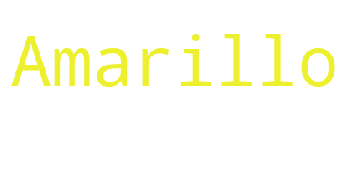

In [147]:
# Semáforo para Ushuaia
semaforo(llamados_ush, internaciones_ushuaia)

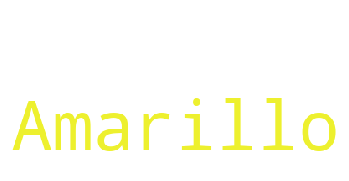

In [148]:
# Semáforo para Rio Grande
semaforo(llamados_rg, internaciones_riogrande)